# Movies Data Analysis Project

# 📌 Objective  
This project analyzes a movie dataset to discover trends in ratings, genres, release patterns, and other insights.  
The goal is to understand what factors influence a movie’s popularity and rating.

## Import Libraries

In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

## Data Loading & Overview

In [174]:
df = pd.read_csv('mymoviedb.csv' , lineterminator = '\n')

In [175]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url\r\r\r\r\r\r\r
0,15-12-2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940.0,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,01-03-2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151.0,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,25-02-2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122.0,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,24-11-2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076.0,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,22-12-2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793.0,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9826 non-null   float64
 5   Vote_Average       9826 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
  9837 non-null   object 
dtypes: float64(3), object(6)
memory usage: 691.8+ KB


In [177]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [178]:
df.duplicated().sum()

0

In [179]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9826.000000,9826.000000
mean,40.320570,1392.943721,6.439467
std,108.874308,2611.303856,1.129797
min,7.100000,0.000000,0.000000
25%,16.127500,146.000000,5.900000
50%,21.191000,444.000000,6.500000
75%,35.174500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


## Data Cleaning & Missing Value Handling

#  Exploratory Data Analysis 


In [180]:
df['Release_Date'].head()

0    15-12-2021
1    01-03-2022
2    25-02-2022
3    24-11-2021
4    22-12-2021
Name: Release_Date, dtype: object

In [181]:
df['Release_Date'] = df['Release_Date'].astype(str).str.strip()

df['Release_Date'] = df['Release_Date'].str.replace('/' , '-' , regex = False)

In [182]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'] , format = '%d-%m-%Y' , errors = 'coerce')

print(df['Release_Date'].dtype)

datetime64[ns]


In [183]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url\r\r\r\r\r\r\r
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940.0,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151.0,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122.0,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076.0,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793.0,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [184]:
df['Release_Date'] = df['Release_Date'].dt.year
df['Release_Date'].dtypes

dtype('float64')

In [185]:
df["Vote_Count"] = pd.to_numeric(df["Vote_Count"],errors="coerce").astype("Int64")
df["Release_Date"] = pd.to_numeric(df["Release_Date"],errors="coerce").astype("Int64")

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   Int64  
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9826 non-null   Int64  
 5   Vote_Average       9826 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
  9837 non-null   object 
dtypes: Int64(2), float64(2), object(5)
memory usage: 711.0+ KB


In [187]:
df.drop(columns = ['Overview' , 'Original_Language' , 'Poster_Url\r\r\r\r\r\r\r'], inplace = True)

In [188]:
print(df.columns)

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')


In [189]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


In [190]:


def categorized_col(df, col, labels):
    # Ensure the column is numeric
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Get basic statistics
    desc = df[col].describe()
    
    # Create bin edges from percentiles
    edges = [desc['min'], desc['25%'], desc['50%'], desc['75%'], desc['max']]
    
    # Remove duplicate edges 
    edges = sorted(list(set(edges)))
    
    # Apply pd.cut to categorize column
    df[col + '_category'] = pd.cut(df[col], bins=edges, labels=labels[:len(edges)-1], duplicates='drop')
    
    return df


In [191]:
# define labels for edges
labels = ['not_popular', 'below_avg', 'average', 'popular']
# categorize column based on labels and edges
categorized_col(df, 'Vote_Average', labels)


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Vote_Average_category
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction",popular
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller",popular
2,2022,No Exit,2618.087,122,6.3,Thriller,below_avg
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy",popular
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War",average
...,...,...,...,...,...,...,...
9832,1973,Badlands,13.357,896,7.6,"Drama, Crime",popular
9833,2020,Violent Delights,13.356,8,3.5,Horror,not_popular
9834,2016,The Offering,13.355,94,5.0,"Mystery, Thriller, Horror",not_popular
9835,2021,The United States vs. Billie Holiday,13.354,152,6.7,"Music, Drama, History",average


In [192]:
df['Vote_Average_category'].value_counts()

Vote_Average_category
not_popular    2467
popular        2450
average        2411
below_avg      2398
Name: count, dtype: int64

In [193]:
# dropping NaNs
df.dropna(inplace = True)
# confirming
df.isna().sum()

Release_Date             0
Title                    0
Popularity               0
Vote_Count               0
Vote_Average             0
Genre                    0
Vote_Average_category    0
dtype: int64

In [194]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Vote_Average_category
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction",popular
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller",popular
2,2022,No Exit,2618.087,122,6.3,Thriller,below_avg
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy",popular
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War",average


we'd split genres into a list and then  explode our dataframe to have only one genre per row for each movie

In [195]:
df['Genre'] = df['Genre'].str.split(', ')

df = df.explode('Genre').reset_index(drop = True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Vote_Average_category
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action,popular
1,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure,popular
2,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction,popular
3,2022,The Batman,3827.658,1151,8.1,Crime,popular
4,2022,The Batman,3827.658,1151,8.1,Mystery,popular


In [196]:
df['Genre'] = df['Genre'].astype('category')

df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Release_Date           25551 non-null  Int64   
 1   Title                  25551 non-null  object  
 2   Popularity             25551 non-null  float64 
 3   Vote_Count             25551 non-null  Int64   
 4   Vote_Average           25551 non-null  float64 
 5   Genre                  25551 non-null  category
 6   Vote_Average_category  25551 non-null  category
dtypes: Int64(2), category(2), float64(2), object(1)
memory usage: 1.1+ MB


In [198]:
df.nunique()

Release_Date              100
Title                    9414
Popularity               8087
Vote_Count               3265
Vote_Average               73
Genre                      19
Vote_Average_category       4
dtype: int64

Data Visualization

In [199]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Vote_Average_category
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action,popular
1,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure,popular
2,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction,popular
3,2022,The Batman,3827.658,1151,8.1,Crime,popular
4,2022,The Batman,3827.658,1151,8.1,Mystery,popular


## Data Visualization

In [200]:
#setting up seaborn configurations
sns.set_style('whitegrid')

## What is the most frequent genre in the dataset?

In [201]:
df['Genre'].describe()

count     25551
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

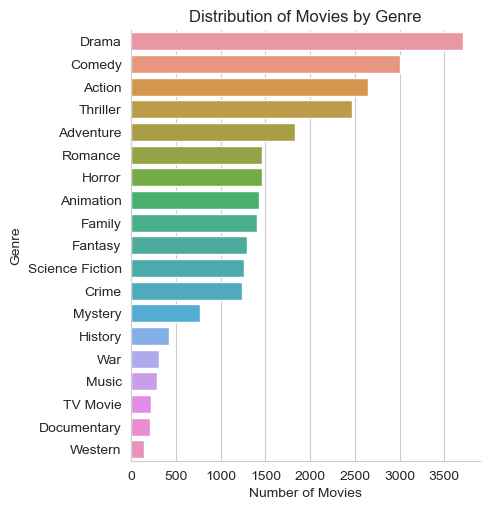

In [202]:
sns.catplot(
    y='Genre',
    data=df,
    kind='count',
    order=df['Genre'].value_counts().index,   
)
  
plt.title('Distribution of Movies by Genre')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()



Insight: Drama is the most frequently occurring genre in the dataset, indicating that it is widely produced. However, high production volume does not always guarantee higher popularity or ratings.

## What genres has highest votes ?

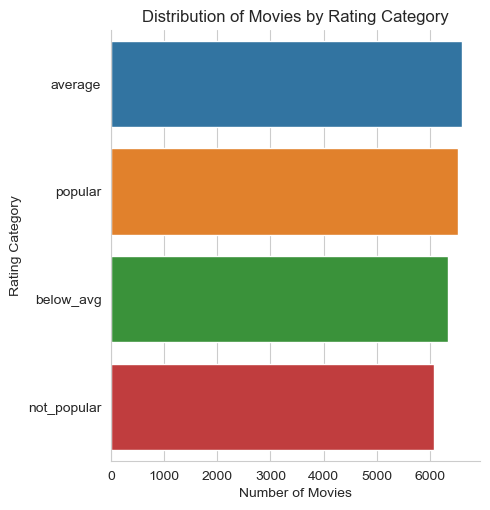

In [203]:
sns.catplot(
    y='Vote_Average_category',
    data=df,
    kind='count',
    order=df['Vote_Average_category'].value_counts().index
)
plt.title('Distribution of Movies by Rating Category')
plt.xlabel('Number of Movies')
plt.ylabel('Rating Category')
plt.show()


Insight: Most movies fall into the average and popular rating categories, suggesting that the majority of movies receive moderate to positive audience feedback

## What movie got the highest popularity ? what's its genre ?

In [204]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Vote_Average_category
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action,popular
1,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure,popular
2,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction,popular


Insight: Spider-Man: No Way Home has the highest popularity score and belongs to Action, Adventure, and Science Fiction genres, indicating that high-budget franchise films tend to attract larger audiences.

## What movie got the lowest popularity? what's its genre?

In [205]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Vote_Average_category
25545,2021,The United States vs. Billie Holiday,13.354,152,6.7,Music,average
25546,2021,The United States vs. Billie Holiday,13.354,152,6.7,Drama,average
25547,2021,The United States vs. Billie Holiday,13.354,152,6.7,History,average
25548,1984,Threads,13.354,186,7.8,War,popular
25549,1984,Threads,13.354,186,7.8,Drama,popular
25550,1984,Threads,13.354,186,7.8,Science Fiction,popular


Insight: Movies with lower popularity scores are often from niche genres such as History, Drama, or War, which may appeal to a limited audience.

## Which year has the most filmmed movies?

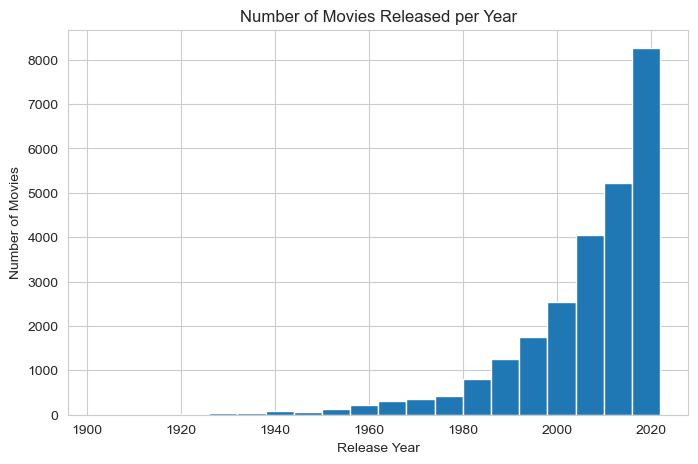

In [206]:
plt.figure(figsize=(8,5))
plt.hist(df['Release_Date'], bins=20)
plt.title('Number of Movies Released per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.show()

Insight: The number of movie releases has increased significantly in recent years, showing growth in the film industry and content production.

## Conclusion:
This project analyzed over 9,800 movies to identify trends in genres, popularity,
ratings, and release patterns. Drama emerged as the most produced genre, while
highly popular movies were dominated by Action and Adventure categories. The
analysis also showed a steady increase in movie production over recent years.
Overall, the project demonstrates how data analysis can uncover meaningful
insights from real-world datasets.
